In [3]:
import py2neo
graph = py2neo.Graph("bolt:://localhost:7687", auth=("neo4j", "password4j"), name="neo4j")

In [4]:
# 1. How many actors played in more than 2 movie ? Get their names and year they were born.

query = """
    MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
    with play, count(m) as film where film > 2
    return play
    """
graph.run(query)

play
"(_6555:Person {born: 1960, name: 'Hugo Weaving'})"
"(_6552:Person {born: 1964, name: 'Keanu Reeves'})"
"(_6554:Person {born: 1961, name: 'Laurence Fishburne'})"


In [10]:
# 2. In how many movies did Tom hanks play ?

query = """
    MATCH (m:Movie)<-[:ACTED_IN]-(play:Person{name:"Tom Hanks"})
    with count(play.name) as nombre
    return nombre
    """
graph.run(query)

nombre
12


In [11]:
# 3. In average in how many movies do actors play in ?

query = """
    MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
    with play, count(m) as film
    return avg(film)
"""
graph.run(query)

avg(film)
1.6363636363636365


In [12]:
# 4. In average how many actors are there in a movie ?

query = """
    MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
    with m, count(play.name) as nombre
    return avg(nombre)
    """
graph.run(query)

avg(nombre)
4.5


In [13]:
# 5. In average how many writers is needed to write a movie ?

query= """
     MATCH (P:Person)-[:WROTE]->(m:Movie)
     with m,count(P.name) as nombre
     RETURN avg(nombre)
"""
graph.run(query)

avg(nombre)
1.2857142857142856


In [14]:
# 6. What is the proportion of writers that also directed the movie ?

query ="""
    MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
     return count(play.name) as acteur
     """
query1 = """
     MATCH (P:Person)-[:WROTE]->(m:Movie)
     with count(P.name) as ecrivain
     RETURN floor(ecrivain/180 )
     """
graph.run(query)
graph.run(query1)

floor(ecrivain/180 )
0.0


/Users/zac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year.released', ylabel='Density'>

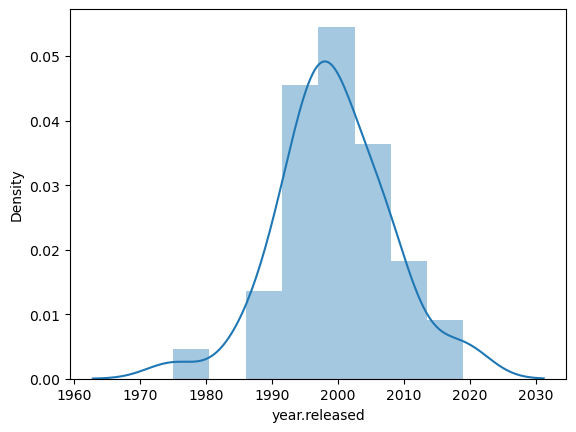

In [16]:
# 7. Do an histogram of the year of release for the movies.

import seaborn as sns
%matplotlib inline
query = """ Match (year:Movie) return year.released """
data = graph.run(query).to_data_frame() 
sns.distplot(data['year.released'])

In [17]:
# 8. Who are the 10 actors with the most movie played in

query = """
    MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
    return play.name ,count(m) as ma
    Order by ma desc
    Limit 10
    """
graph.run(query)

play.name,ma
Tom Hanks,12
Keanu Reeves,7
Meg Ryan,5


In [20]:
# 9. Delete every movie made by a director of your choosing

query="""
 MATCH (p:Person{name:"Quentin Tarantino"})-[r:ACTED_IN]->(m:Movie)
 DETACH DELETE m
 """
graph.run(query)

(No data)

In [24]:
# 10. Give some statistics that you find interesting.

query = """
    Match (year:Movie) return year.released
"""
graph.run(query)

# Funny yo see the differents years

year.released
1999
2003
2003
